In [1]:
# Data manipulation
import numpy as np 
import pandas as pd 
from PIL import Image


import pandas_profiling
# Text manipulation
from string import punctuation
#from stop_words import get_stop_words
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# NLP Module
import nltk
from nltk import word_tokenize
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords


# Extra imports
import seaborn as sns
import matplotlib as plt
from collections import Counter
from itertools import chain 

In [2]:
# Path of folders where data are stored
DATA_PATH = "data/"
FIG_PATH = "fig/"

__Please note that when you see commented code, it is code that might be useful at a moment, but do not focus on it or try to make it works if not asked to.__

# Hands ON 1

## Load Data

In [3]:
# Try to name your data / dataframe explicitly. 
file_name = "raw_scrapped_data.csv.gzip"
file_path = DATA_PATH + file_name

# Reading data
scrapped_data = pd.read_csv(file_path, compression='gzip')

In [4]:
#scrapped_data = pd.read_json(DATA_PATH + "scrapped_data", lines=True)

#import json_lines
#json_data = []
#with open(DATA_PATH + "raw_review_london.jl", 'rb') as f:
#     reader = json_lines.reader(f)
#for line in reader:
#    try:
#        json_data.append(line)
#    except:
#        pass
        
#scrapped_data = pd.DataFrame.from_records(json_data)
#print(scrapped_data.shape)

In [5]:
scrapped_data.head()

,id_resto,id_comment,resto,resto_url,rating,title,diner_date,rating_date,answer_text,reviewer_pseudo,reviewer_origin,reviewer_info_sup,other_ratings_category,other_ratings_value,url,content
0,g186419-d2329575,g186419-d2329575-r162050560,The_Duchess_of_Cambridge_Pub,/Restaurant_Review-g186419-d2329575-Reviews-Th...,5,Old Brand New pub with great food and service,May 2013,"May 27, 2013",NaN,edwardo671,"['New Bern, North Carolina']","[['pencil-paper', '616'], ['thumbs-up-fill', '...","['Value', 'Atmosphere', 'Service', 'Food']","['50', '50', '50', '50']",https://www.tripadvisor.com/ShowUserReviews-g1...,['Decided to visit Windsor castle on the way b...
1,g186338-d777616,g186338-d777616-r478335137,Three_Stags,/Restaurant_Review-g186338-d777616-Reviews-Thr...,2,"Nice food, waiter rude",April 2017,"April 23, 2017",NaN,dazcage,"['London, United Kingdom']","[['pencil-paper', '1'], ['thumbs-up-fill', '1']]","['Value', 'Service', 'Food']","['30', '10', '40']",https://www.tripadvisor.com/ShowUserReviews-g1...,['The food was very good (although rather smal...
2,g186338-d4867760,g186338-d4867760-r352386922,Union_Street_Cafe,/Restaurant_Review-g186338-d4867760-Reviews-Un...,5,A fantastic experience,February 2016,"March 2, 2016",NaN,ashburton88,"['Swindon, United Kingdom']","[['pencil-paper', '11'], ['thumbs-up-fill', '2...","['Value', 'Service', 'Food']","['50', '50', '50']",https://www.tripadvisor.com/ShowUserReviews-g1...,['When looking for somewhere in budget to go a...
3,g186338-d8286686,g186338-d8286686-r733653998,Pure_Cyprus,/Restaurant_Review-g186338-d8286686-Reviews-Pu...,4,Authentic cypriot food,December 2019,"December 19, 2019",NaN,cookie89Manchester,['manchester'],"[['pencil-paper', '154'], ['thumbs-up-fill', '...",[],[],https://www.tripadvisor.com/ShowUserReviews-g1...,['Good menu selection. Unfortunately had no st...
4,g186338-d2482431,g186338-d2482431-r616648426,Browns_Victoria,/Restaurant_Review-g186338-d2482431-Reviews-Br...,3,OK for a drink,September 2018,"September 15, 2018","[""Pakabay, it's upsetting to hear that you did...",pakabay,"['Adelaide, Australia']","[['pencil-paper', '1178'], ['thumbs-up-fill', ...",[],[],https://www.tripadvisor.com/ShowUserReviews-g1...,['We popped in here last night for a glass of ...


In [6]:
# Take only a limited number of our reviews to increase speed / reduce process time
# You may want to start with low number of rows to see if your code works, and then increase this number to perform
# relevant and global analysis

# With sample you can specify a raw value of number of rows you want 
#scrapped_data_sample = scrapped_data.sample(30000)

# Or you can specify a fraction of initial rows
scrapped_data = scrapped_data.sample(frac=0.1)

## Explore Data

In [7]:
scrapped_data.head()

,id_resto,id_comment,resto,resto_url,rating,title,diner_date,rating_date,answer_text,reviewer_pseudo,reviewer_origin,reviewer_info_sup,other_ratings_category,other_ratings_value,url,content
21918,g186338-d1044562,g186338-d1044562-r284988940,Podium_Restaurant_Bar,/Restaurant_Review-g186338-d1044562-Reviews-Po...,3,Great teas but ghastly cakes,July 2015,"July 2, 2015","['Dear Maattmoo,', ""Thank you for your feedbac...",Maattmoo,"['Kent, United Kingdom']","[['pencil-paper', '83'], ['thumbs-up-fill', '3...",[],[],https://www.tripadvisor.com/ShowUserReviews-g1...,"['We had an enjoyable time at the Hilton ""Choc..."
32399,g186338-d1380820,g186338-d1380820-r368737677,One_Twenty_One_Two_Restaurant,/Restaurant_Review-g186338-d1380820-Reviews-On...,5,Amazing experience,April 2016,"April 29, 2016","['Dear foodieinlondon2016', 'Thank you for you...",foodieinlondon2016,"['Bristol, United Kingdom']","[['pencil-paper', '2'], ['thumbs-up-fill', '1']]","['Value', 'Service', 'Food']","['40', '50', '50']",https://www.tripadvisor.com/ShowUserReviews-g1...,['Visited the restaurant to celebrate my girlf...
24060,g186338-d7291976,g186338-d7291976-r626792767,Pizza_Pilgrims,/Restaurant_Review-g186338-d7291976-Reviews-Pi...,1,"They serve pizza, and managed to screw it up",October 2018,"October 20, 2018","['Hi there Ciaran.', 'Sorry to hear about your...",Ciaran G,"['London, United Kingdom']","[['pencil-paper', '9'], ['thumbs-up-fill', '7']]","['Value', 'Service', 'Food']","['10', '10', '10']",https://www.tripadvisor.com/ShowUserReviews-g1...,"['If you want pizza, literally anywhere else i..."
27639,g186338-d7221885,g186338-d7221885-r462121562,Heddon_Street_Kitchen,/Restaurant_Review-g186338-d7221885-Reviews-He...,4,"Good Service, Good Food, Nice Ambience",February 2017,"February 22, 2017","['Dear Wilfred, ', 'Thank you for your comment...",WilfredThesiger,"['Singapore, Singapore']","[['pencil-paper', '97'], ['thumbs-up-fill', '4...","['Value', 'Service', 'Food']","['30', '40', '40']",https://www.tripadvisor.com/ShowUserReviews-g1...,['We bought a Gordon Ramsay experience gift vo...
4908,g477981-d9607057,g477981-d9607057-r348646128,TGI_Fridays_Staines,/Restaurant_Review-g477981-d9607057-Reviews-TG...,5,Valentines Meal,February 2016,"February 17, 2016",NaN,kieranryder,"['Slough, United Kingdom']","[['pencil-paper', '38'], ['thumbs-up-fill', '1...",[],[],https://www.tripadvisor.com/ShowUserReviews-g4...,"['It was a great evening, the service was amaz..."


In [8]:
scrapped_data.isna().sum()

id_resto                     0
id_comment                   0
resto                        0
resto_url                    0
rating                       0
title                        0
diner_date                 239
rating_date                  0
answer_text               3902
reviewer_pseudo              0
reviewer_origin              0
reviewer_info_sup            0
other_ratings_category       0
other_ratings_value          0
url                          0
content                      0
dtype: int64

In [9]:
scrapped_data.profile_report()

#### b) Basic review cleaning

In [10]:
# Remove punctuation
scrapped_data['clean_title'] = scrapped_data['title'].str.replace('[^\w\s]','')

# Strip trailing whitespace
scrapped_data['clean_title'] = scrapped_data['clean_title'].str.strip(" ")

# Decapitalize letters
scrapped_data['clean_title'] = scrapped_data['clean_title'].apply(lambda x: x.lower())

In [11]:
# Defining basic cleaning function
def basic_cleaning(series):
    # Punctuation
    new_series = series.str.replace('[^\w\s]','')
    # Trailing whitespace
    new_series = new_series.str.strip(" ")
    # Decapitalizing
    new_series = new_series.apply(lambda x: x.lower())
    return new_series

In [12]:
# Defining tokenizing function

## Downloading nltk packages 
nltk.download('stopwords')
nltk.download('punkt')

def tokenize_filter(sentence):
    # Define stopwords
    stop_words = set(stopwords.words('english')) 
    ## Add personalised stop words
    stop_words.add("london")
    
    # Filter the sentence
    word_tokens = word_tokenize(sentence) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    return (word_tokens, filtered_sentence) 

[nltk_data] Downloading package stopwords to /Users/sarah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sarah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# Tokenizing the clean reviews without any stopwords 
tokenized_reviews = scrapped_data["clean_title"].apply(lambda x: tokenize_filter(x)[1])

#### c) Datetime format

In [14]:
scrapped_data["diner_date"] = pd.to_datetime(scrapped_data["diner_date"])
scrapped_data["rating_date"] = pd.to_datetime(scrapped_data["rating_date"])

## Feature Engineering

#### a) Review length

In [15]:
scrapped_data["len_review"] = scrapped_data.apply(lambda x: len(x["title"]), axis=1)

#### b) Weekday

In [16]:
scrapped_data['day_of_week'] = scrapped_data.apply(lambda x: x["rating_date"].day, axis=1)

#### c) Rating and dinner time lapse

In [17]:
# Month difference - could clearly be improved as a feature
scrapped_data["diner_rating_diff"] = scrapped_data.apply(lambda x: x["diner_date"].month-x["rating_date"].month, axis=1)

In [18]:
scrapped_data.head()

,id_resto,id_comment,resto,resto_url,rating,title,diner_date,rating_date,answer_text,reviewer_pseudo,reviewer_origin,reviewer_info_sup,other_ratings_category,other_ratings_value,url,content,clean_title,len_review,day_of_week,diner_rating_diff
21918,g186338-d1044562,g186338-d1044562-r284988940,Podium_Restaurant_Bar,/Restaurant_Review-g186338-d1044562-Reviews-Po...,3,Great teas but ghastly cakes,2015-07-01,2015-07-02,"['Dear Maattmoo,', ""Thank you for your feedbac...",Maattmoo,"['Kent, United Kingdom']","[['pencil-paper', '83'], ['thumbs-up-fill', '3...",[],[],https://www.tripadvisor.com/ShowUserReviews-g1...,"['We had an enjoyable time at the Hilton ""Choc...",great teas but ghastly cakes,28,2,0.0
32399,g186338-d1380820,g186338-d1380820-r368737677,One_Twenty_One_Two_Restaurant,/Restaurant_Review-g186338-d1380820-Reviews-On...,5,Amazing experience,2016-04-01,2016-04-29,"['Dear foodieinlondon2016', 'Thank you for you...",foodieinlondon2016,"['Bristol, United Kingdom']","[['pencil-paper', '2'], ['thumbs-up-fill', '1']]","['Value', 'Service', 'Food']","['40', '50', '50']",https://www.tripadvisor.com/ShowUserReviews-g1...,['Visited the restaurant to celebrate my girlf...,amazing experience,18,29,0.0
24060,g186338-d7291976,g186338-d7291976-r626792767,Pizza_Pilgrims,/Restaurant_Review-g186338-d7291976-Reviews-Pi...,1,"They serve pizza, and managed to screw it up",2018-10-01,2018-10-20,"['Hi there Ciaran.', 'Sorry to hear about your...",Ciaran G,"['London, United Kingdom']","[['pencil-paper', '9'], ['thumbs-up-fill', '7']]","['Value', 'Service', 'Food']","['10', '10', '10']",https://www.tripadvisor.com/ShowUserReviews-g1...,"['If you want pizza, literally anywhere else i...",they serve pizza and managed to screw it up,44,20,0.0
27639,g186338-d7221885,g186338-d7221885-r462121562,Heddon_Street_Kitchen,/Restaurant_Review-g186338-d7221885-Reviews-He...,4,"Good Service, Good Food, Nice Ambience",2017-02-01,2017-02-22,"['Dear Wilfred, ', 'Thank you for your comment...",WilfredThesiger,"['Singapore, Singapore']","[['pencil-paper', '97'], ['thumbs-up-fill', '4...","['Value', 'Service', 'Food']","['30', '40', '40']",https://www.tripadvisor.com/ShowUserReviews-g1...,['We bought a Gordon Ramsay experience gift vo...,good service good food nice ambience,38,22,0.0
4908,g477981-d9607057,g477981-d9607057-r348646128,TGI_Fridays_Staines,/Restaurant_Review-g477981-d9607057-Reviews-TG...,5,Valentines Meal,2016-02-01,2016-02-17,NaN,kieranryder,"['Slough, United Kingdom']","[['pencil-paper', '38'], ['thumbs-up-fill', '1...",[],[],https://www.tripadvisor.com/ShowUserReviews-g4...,"['It was a great evening, the service was amaz...",valentines meal,15,17,0.0


## Some visualisations

#### a) Most common words

In [19]:
reviews = scrapped_data["clean_title"].str.split()
most_frequent_words = Counter(chain(*reviews)).most_common()
most_frequent_words

[('food', 928),
 ('great', 774),
 ('and', 598),
 ('good', 557),
 ('service', 479),
 ('a', 478),
 ('the', 411),
 ('in', 305),
 ('for', 258),
 ('excellent', 248),
 ('to', 220),
 ('lunch', 218),
 ('but', 208),
 ('nice', 206),
 ('very', 195),
 ('place', 194),
 ('best', 188),
 ('lovely', 170),
 ('amazing', 166),
 ('not', 162),
 ('restaurant', 161),
 ('of', 157),
 ('experience', 144),
 ('with', 136),
 ('london', 131),
 ('atmosphere', 126),
 ('meal', 119),
 ('delicious', 110),
 ('pub', 109),
 ('dinner', 108),
 ('staff', 100),
 ('it', 93),
 ('fantastic', 91),
 ('italian', 89),
 ('at', 85),
 ('friendly', 81),
 ('birthday', 78),
 ('is', 76),
 ('wonderful', 74),
 ('average', 72),
 ('visit', 72),
 ('perfect', 71),
 ('value', 71),
 ('poor', 69),
 ('tea', 68),
 ('disappointing', 67),
 ('be', 66),
 ('breakfast', 66),
 ('this', 65),
 ('what', 63),
 ('on', 60),
 ('my', 57),
 ('was', 57),
 ('evening', 57),
 ('indian', 56),
 ('afternoon', 55),
 ('tasty', 53),
 ('night', 52),
 ('ever', 52),
 ('time', 52),

#### b) Worldcloud of our title reviews

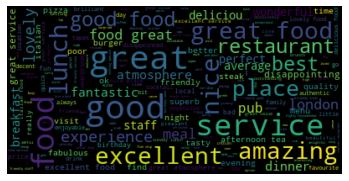

In [20]:
text = scrapped_data['clean_title'].to_string()
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Setting max font size to 40 to display more words
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.pyplot.figure()
plt.pyplot.imshow(wordcloud, interpolation="bilinear")
plt.pyplot.axis("off")
plt.pyplot.show() 

#### c) Average rating depending on review length

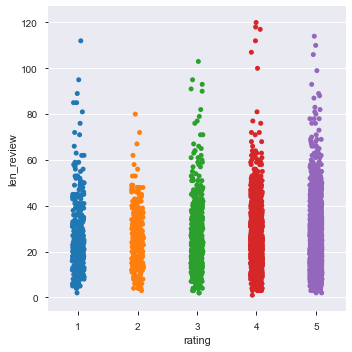

In [21]:
sns.catplot(x="rating", y="len_review", data=scrapped_data)

In [22]:
scrapped_data.groupby("len_review").mean()

,rating,day_of_week,diner_rating_diff
len_review,,,
1,4.000000,30.000000,0.000000
2,3.400000,15.600000,0.000000
3,4.285714,16.476190,0.850000
4,3.842105,15.789474,-0.200000
5,3.852941,16.323529,0.181818
6,4.063830,17.787234,-0.173913
7,4.392405,16.417722,-0.066667
8,4.086957,15.173913,0.161765
9,4.267606,16.098592,0.075188


In [23]:
# To go further : How to see if the rating associated with the review is related to the length of the comment?
# Test statistic one-way anova

#### d) Presence of not next to a word

## Work on reviews

### Preprocessing

In [24]:
reviews = scrapped_data["content"] # changed review type...

In [25]:
# Homework function #1 
## Downloading useful nltk packages
nltk.download('stopwords')
nltk.download('punkt')

def basic_cleaning(corpus):
    # Punctuation
    new_corpus = corpus.str.replace('[^\w\s]','')
    # Trailing whitespace
    new_corpus = new_corpus.str.strip(" ")
    # Decapitalizing
    new_corpus = new_corpus.apply(lambda x: x.lower())    
    return new_corpus

[nltk_data] Downloading package stopwords to /Users/sarah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sarah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
# Adding a tokenizing and filtering function
## Downloading useful nltk packages 
nltk.download('stopwords')
nltk.download('punkt')

def tokenize_filter(sentence):
    # Define stopwords
    stop_words = set(stopwords.words('english')) 
    ## Add personalised stop words
    stop_words.add("london")
    
    # Filter the sentence
    word_tokens = word_tokenize(sentence) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    return (word_tokens, filtered_sentence) 

[nltk_data] Downloading package stopwords to /Users/sarah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sarah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
reviews = basic_cleaning(reviews).apply(lambda x: tokenize_filter(x)[1])

___
___

__<font color='red'>
   Do not go further during Hands On 1, work on your visualizations instead !! 
</font>__
 
___
___

# Hands On 2

## Stemming

In [28]:
nltk.download('wordnet')
def lemmatize_review(tokens):
    lemmatizer = WordNetLemmatizer()
    return reviews.apply(lambda x: [lemmatizer.lemmatize(x[i]) for i in range(len(x))])

[nltk_data] Downloading package wordnet to /Users/sarah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
lemmatized_reviews = lemmatize_review(reviews)
lemmatized_reviews

21918    [enjoyable, time, hilton, chocoholic, afternoo...
32399    [visited, restaurant, celebrate, girlfriend, b...
24060    [want, pizza, literally, anywhere, else, bette...
27639    [bought, gordon, ramsay, experience, gift, vou...
4908     [great, evening, service, amazing, considering...
48375    [hard, choose, breakfast, main, menu, aim, ple...
16882    [service, reasonably, attentive, meal, mdecide...
17514    [forget, food, thats, good, enough, go, quirky...
11978    [visited, friday, night, meal, group, 9, start...
2928     [fabulous, restaurant, small, menu, broad, set...
21942    [nice, food, real, italian, taste, good, servi...
13632    [close, spanish, bar, concept, spanish, spoken...
26933    [u, friend, visiting, chose, restaurant, since...
29764    [youre, visiting, highly, recommend, swinging,...
9051     [problem, popular, expect, wait, table, think,...
5729     [rode, staff, told, closed, midnight, 11pm, sa...
39518    [cod, chip, lunch, good, stay, away, mushy, pe.

___
___

__<font color='red'>
    Do not go further during Hands On 2, explore different stemmer/lemmatizer and their paramters instead !
</font>__
 
___
___

# Hands On 3

## Bag of Words

In [30]:
# We can use this word frequency counter as a base for the bag of words
word_frequency = Counter(chain(*reviews)).most_common()
word_frequency

[('food', 4172),
 ('good', 3021),
 ('service', 2529),
 ('great', 1941),
 ('restaurant', 1922),
 ('staff', 1813),
 ('would', 1475),
 ('place', 1411),
 ('us', 1317),
 ('really', 1218),
 ('menu', 1155),
 ('one', 1151),
 ('time', 1146),
 ('table', 1133),
 ('friendly', 1129),
 ('nice', 1106),
 ('back', 1033),
 ('well', 995),
 ('go', 931),
 ('excellent', 918),
 ('meal', 909),
 ('like', 845),
 ('lovely', 789),
 ('delicious', 785),
 ('lunch', 746),
 ('also', 739),
 ('went', 722),
 ('wine', 704),
 ('recommend', 700),
 ('experience', 693),
 ('get', 673),
 ('atmosphere', 673),
 ('visit', 661),
 ('best', 629),
 ('ordered', 601),
 ('definitely', 594),
 ('bar', 580),
 ('amazing', 570),
 ('could', 569),
 ('little', 564),
 ('came', 560),
 ('even', 546),
 ('dishes', 542),
 ('much', 537),
 ('evening', 529),
 ('didnt', 522),
 ('tasty', 522),
 ('order', 514),
 ('always', 501),
 ('dinner', 498),
 ('bit', 497),
 ('eat', 497),
 ('two', 489),
 ('drinks', 489),
 ('made', 485),
 ('small', 475),
 ('busy', 474),


In [31]:
# Some coding "inspiration" from the internet, to tweak
#sentence_vectors = []
#for token in word_frequency:
#    sent_vec = []
#    if token in reviews:
#        sent_vec.append(1)
#    else:
#        sent_vec.append(0)
#sentence_vectors.append(sent_vec)

## TFIDF

In [32]:
# You can use your own function to vectorize (TF or TF-IDF), but it is recommened to use libraries when possible.
# It is way more scalable and lot of functionnalities are implemented

In [33]:
# Try different parameters from TfidfVectorizer

## WordClouds

In [34]:
# Define a mask for wordcloud
image = Image.open(FIG_PATH + "plate.jpg")
plate_mask = np.array(image)

## Function from corpus to wordcloud

In [35]:
# Homework function 2 
def from_corpus_to_word_cloud(text_column):
    text_column = text_column.to_string()
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text_column)
    # Setting max font size to 50 to display more words
    wordcloud = WordCloud(max_font_size=50).generate(text_column)
    plt.pyplot.figure()
    plt.pyplot.imshow(wordcloud, interpolation="bilinear")
    plt.pyplot.axis("off")
    plt.pyplot.show() 
    return wordcloud

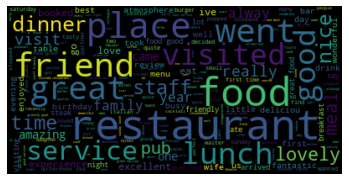

In [36]:
from_corpus_to_word_cloud(reviews)

# Homeworks

For homework you are asked to code 2 functions : 
- A function that do the basic cleaning of a corpus
- A function that creates a wordcloud from a cleaned corpus

Bonus : Be creative about text visualisations, and on how to get relevant insights from your reviews